In [1]:
import pandas as pd
import numpy as np
from countrygroups import G20
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 
import matplotlib.pyplot as plt 
import re

In [2]:
# Go to datasets>Pre-processing.ipynb to generate this file
link = r'/Users/jiaminlim/Documents/Research/climate_nlp/global-stocktake-documents/df_countrysubmissions.csv'
df_countrysubmissions = pd.read_csv(link)

/var/folders/tj/w37gcb090bj93v3xpklf678r0000gn/T/ipykernel_16094/2658606829.py:3: DtypeWarning: Columns (8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_countrysubmissions = pd.read_csv(link)


In [3]:
# Function to count total occurrences of word "w" in String "str"
# Does not include where word is embedded in another word e.g does not count if word is 'gipcc'
def countOccurrences(string, w):
    string = str(string)
    # Get the regex to be checked
    regexPattern = "\\b" + w + "\\b"
     
    # Variable to count total occurrences of the given word
    count = 0
     
    for m in re.finditer(regexPattern, string, re.IGNORECASE):
        # Increment count
        count += 1
         
    # Print the occurrences of the word
    #print(count)
    return count

In [4]:
# Adding new columns to count various terms
df_countrysubmissions['regex_n_ipcc_full'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"Intergovernmental Panel on Climate Change"))
df_countrysubmissions['regex_n_ipcc'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"ipcc"))
df_countrysubmissions['regex_n_ipcc_all'] = df_countrysubmissions['regex_n_ipcc_full'] + df_countrysubmissions['regex_n_ipcc']

df_countrysubmissions['regex_n_ar5'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"AR5"))
df_countrysubmissions['regex_n_ar6'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"AR6"))
df_countrysubmissions['regex_n_2006ipcc'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"2006 IPCC"))
df_countrysubmissions['regex_n_2006ipccguidelines'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"2006 IPCC Guidelines"))

In [8]:
# Calculating counts by year
by_year = df_countrysubmissions[df_countrysubmissions['year']>2006].groupby(['year']).agg(regex_n_ipcc = ('regex_n_ipcc','sum'),
                                                                                          regex_n_ipcc_all = ('regex_n_ipcc_all','sum'),
                                                                                          regex_n_ar5= ('regex_n_ar5','sum'),
                                                                                          regex_n_ar6= ('regex_n_ar6','sum'),
                                                                                          regex_n_2006ipcc= ('regex_n_2006ipcc','sum'),
                                                                                          regex_n_2006ipccg= ('regex_n_2006ipccguidelines','sum'),
                                                                                          n_words=('n_words','sum'))
by_year['%_ipcc'] = by_year['regex_n_ipcc']/by_year['n_words']*100.0
by_year = by_year.reset_index()

,year,regex_n_ipcc,regex_n_ipcc_all,regex_n_ar5,regex_n_ar6,regex_n_2006ipcc,regex_n_2006ipccg,n_words,%_ipcc
0,2009,36,41,0,0,0,0,92078,0.039097
1,2010,128,147,0,0,8,8,234419,0.054603
2,2011,36,41,0,0,3,2,35407,0.101675
3,2012,416,465,0,0,8,5,484128,0.085928
4,2013,247,298,2,0,5,5,551539,0.044784
5,2014,313,368,5,0,17,16,471614,0.066368
6,2015,229,252,0,0,3,3,395768,0.057862
7,2016,1461,1608,157,0,168,124,1529856,0.095499
8,2017,2092,2305,33,1,234,203,3278114,0.063817
9,2018,2942,3210,46,6,506,454,3435492,0.085635


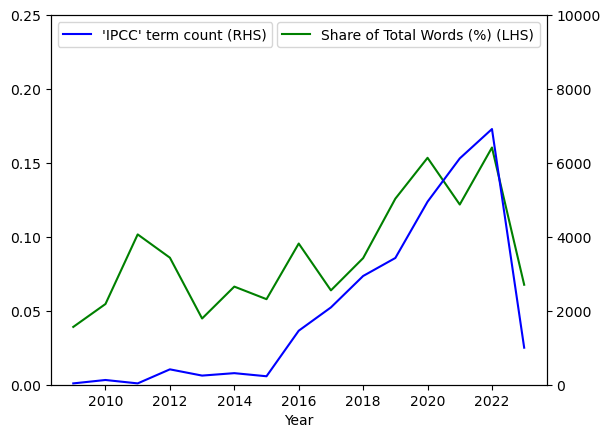

In [9]:
# Graph of number and share
# Creating dataset 
x = by_year['year']
dataset_0 =  by_year['%_ipcc']
dataset_1a =  by_year['regex_n_ipcc']
dataset_2 = by_year['n_words'] 
 
# Creating plot with dataset_1
fig, ax1 = plt.subplots() 
 
ax1.set_xlabel('Year') 
#ax1.set_ylabel('IPCC term counts') 
ax1.plot(x, dataset_0, 'g', label ='Share of Total Words (%) (LHS)') 
ax1.set_ylim([0, 0.25])
ax1.tick_params(axis ='y') 
plt.legend()

# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
 
#ax2.set_ylabel('Total Words') 
ax2.plot(x, dataset_1a, color = 'b', label ='\'IPCC\' term count (RHS)') 
ax2.set_ylim([0, 10000])
ax2.tick_params(axis ='y') 
 
# Adding title
#plt.title('Country Policy Reports - IPCC counts and Total Words', fontweight ="bold") 
plt.legend(loc='upper left')

# Show plot
plt.show()

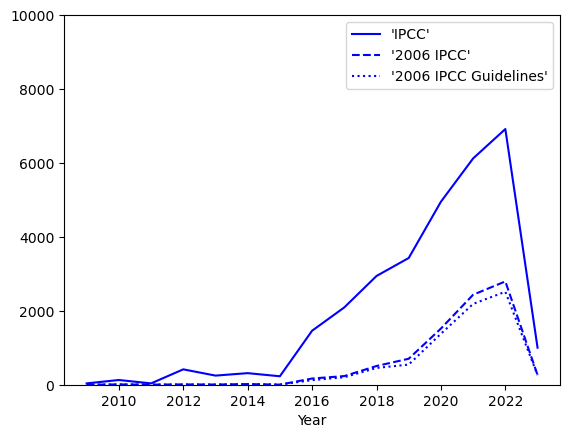

In [10]:
# Graph of IPCC terms
# Creating dataset 
x = by_year['year']
dataset_1a =  by_year['regex_n_ipcc']
dataset_1b =  by_year['regex_n_2006ipcc']
dataset_1c =  by_year['regex_n_2006ipccg']
 
# Creating plot with dataset_1
fig, ax1 = plt.subplots() 
 
ax1.set_xlabel('Year') 
#ax1.set_ylabel('IPCC term counts') 
ax1.plot(x, dataset_1a, 'b', label ='\'IPCC\'') 
ax1.plot(x, dataset_1b, 'b', linestyle='dashed', label ='\'2006 IPCC\'') 
ax1.plot(x, dataset_1c, 'b', linestyle='dotted', label ='\'2006 IPCC Guidelines\'') 

ax1.set_ylim([0, 10000])
ax1.tick_params(axis ='y') 
plt.legend()

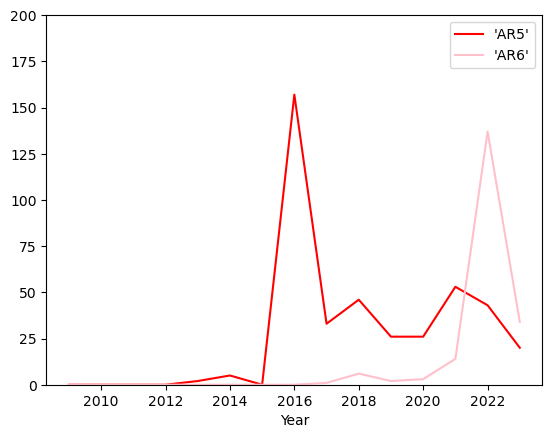

In [11]:
# Graphs of AR5 and AR6 counts
# Creating dataset 
x = by_year['year']
dataset_1a =  by_year['regex_n_ar5']
dataset_1b =  by_year['regex_n_ar6']


# Creating plot with dataset_1
fig, ax1 = plt.subplots() 
 
ax1.set_xlabel('Year') 
#ax1.set_ylabel('IPCC term counts') 
ax1.plot(x, dataset_1a, 'r', label ='\'AR5\'') 
ax1.plot(x, dataset_1b, 'pink', label ='\'AR6\'') 


ax1.set_ylim([0, 200])
ax1.tick_params(axis ='y') 
plt.legend()

### By country

In [20]:
# Create table by country
by_country = df_countrysubmissions[df_countrysubmissions['geography_iso'].isin(G20)].groupby(['geography_iso']).agg(regex_n_ipcc = ('regex_n_ipcc','sum'), n_words=('n_words','sum'))
by_country['%_ipcc'] = by_country['regex_n_ipcc']/by_country['n_words']*100.0
by_country = by_country.drop('n_words', axis=1)
by_country = by_country.reset_index()
by_country.sort_values(by='%_ipcc',ascending=False)
#by_country.plot(kind='barh',legend=False,xlabel='Share of total words (%)',ylabel='G20 Country')

,geography_iso,regex_n_ipcc,%_ipcc
0,ARG,1965,0.317007
2,BRA,101,0.257804
18,ZAF,1089,0.255662
13,MEX,1173,0.178896
4,CHN,279,0.135829
16,TUR,371,0.127101
12,KOR,143,0.119258
15,SAU,155,0.083772
17,USA,336,0.071713
8,IDN,95,0.071578


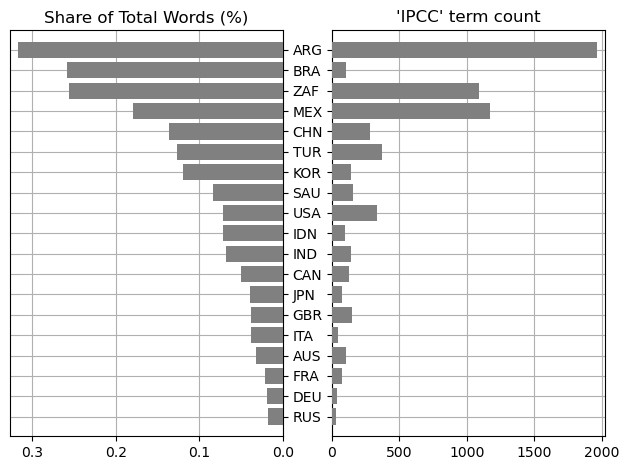

In [21]:
# Create graph by country
y0 = by_country['geography_iso']
x1 =  by_country['%_ipcc']
x2 =  by_country['regex_n_ipcc']

# Sort by number of sales staff
idx = x1.argsort()
y0, x1, x2 = [np.take(x, idx) for x in [y0, x1, x2]]

y = np.arange(x1.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='gray', zorder=10)
axes[0].set(title='Share of Total Words (%)')
axes[1].barh(y, x2, align='center', color='gray', zorder=10)
axes[1].set(title='\'IPCC\' term count')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=y0)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.18)
plt.show()

### By report

In [23]:
# Create table by report
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_report = df_countrysubmissions.groupby(['types0']).agg(regex_n_ipcc = ('regex_n_ipcc','sum'), n_words=('n_words','sum'))
by_report['%_ipcc'] = by_report['regex_n_ipcc']/by_report['n_words']*100.0
# by_report = by_report.drop('regex_n_ipcc', axis=1)
by_report = by_report.drop('n_words', axis=1)
by_report = by_report.reset_index()
by_report

,types0,regex_n_ipcc,%_ipcc
0,Adaptation Communication,109,0.021456
1,Biennial Report,927,0.039560
2,Biennial Update Report,5714,0.172026
3,Fast-Start Finance Report,4,0.005294
4,Long-Term Low-Emission Development Strategy,464,0.030632
5,National Adaptation Plan,99,0.052921
6,National Communication,9898,0.067904
7,National Inventory Report,10715,0.460955
8,Nationally Determined Contribution,1310,0.060538
9,Statement,0,0.000000


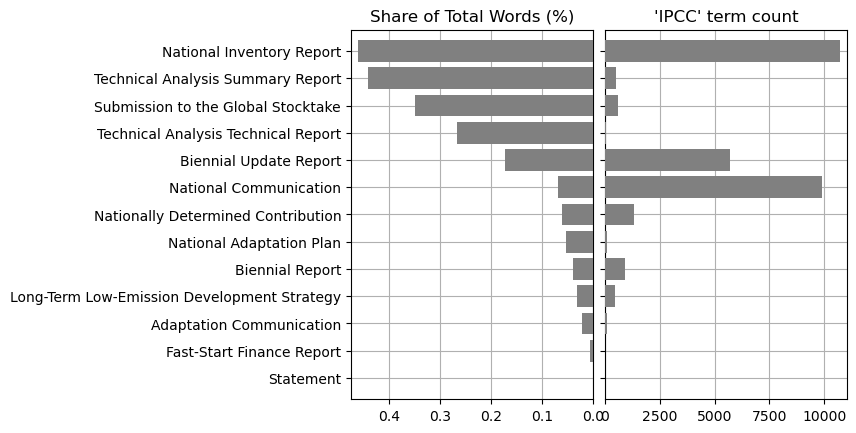

In [24]:
# Create graph by report
y0 = by_report['types0']
x1 =  by_report['%_ipcc']
x2 =  by_report['regex_n_ipcc']

# Sort by number of sales staff
idx = x1.argsort()
y0, x1, x2 = [np.take(x, idx) for x in [y0, x1, x2]]

y = np.arange(x1.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='gray', zorder=10)
axes[0].set(title='Share of Total Words (%)')
axes[1].barh(y, x2, align='center', color='gray', zorder=10)
axes[1].set(title='\'IPCC\' term count')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=y0)
#axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

#fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
plt.show()

### By report type & country

<Axes: xlabel='types0', ylabel='geography_iso_name'>

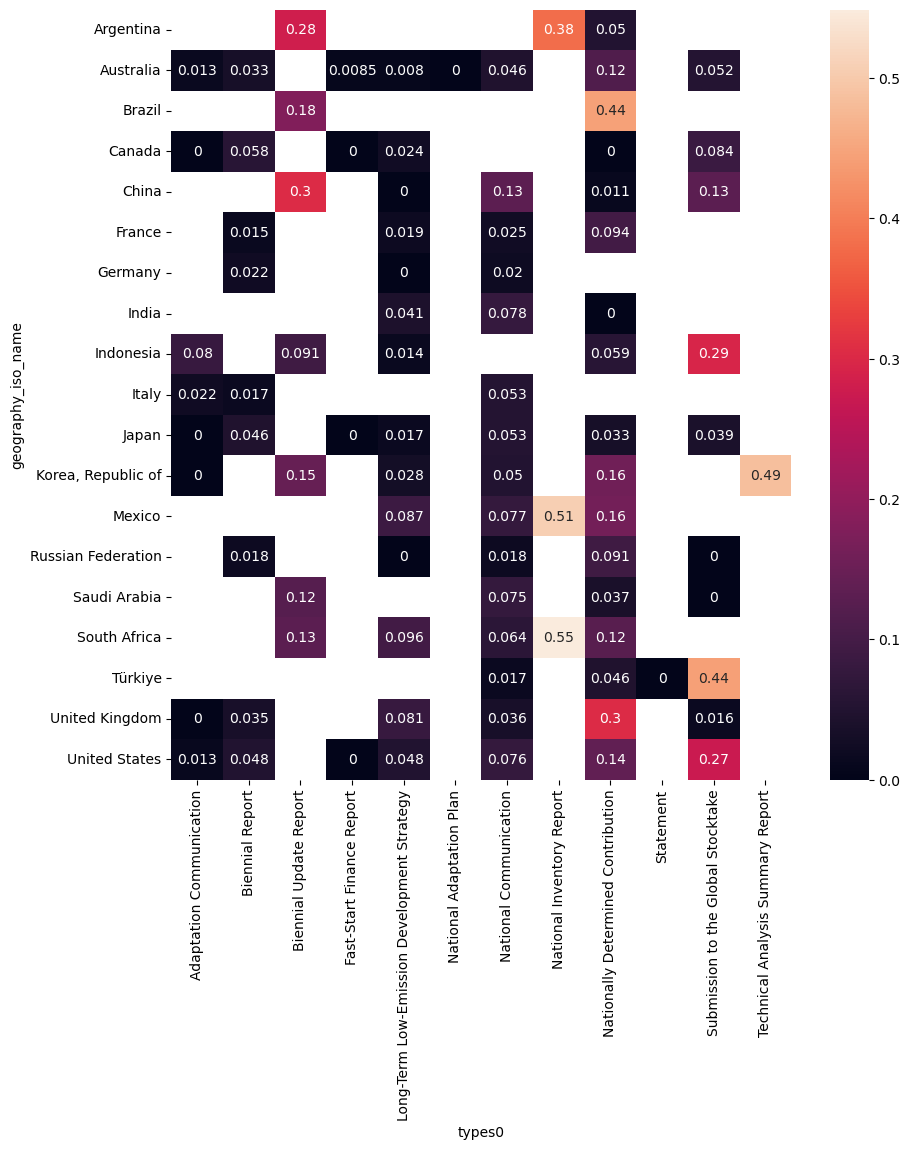

In [31]:
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype = df_countrysubmissions[df_countrysubmissions['geography_iso'].isin(G20)].groupby(['geography_iso_name','types0']).agg(n_ipcc = ('regex_n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype['%_ipcc'] = by_countrytype['n_ipcc']/by_countrytype['n_words']*100.0
by_countrytype = by_countrytype.drop('n_ipcc', axis=1)
by_countrytype = by_countrytype.drop('n_words', axis=1)

df_by_countrytype = pd.DataFrame(by_countrytype)
df_by_countrytype = df_by_countrytype.reset_index()
df_by_countrytype = df_by_countrytype.pivot(index='geography_iso_name', columns='types0', values='%_ipcc')
#df_by_countrytype = df_by_countrytype.fillna(-1)

#df_by_countrytype.index = pd.CategoricalIndex(df_by_countrytype.index, categories= ["orange", "toffee", "chocolate", "malteser", "raisin", "coffee"])
df_by_countrytype.sort_index(level=0, inplace=True)
df_by_countrytype

plt.figure(figsize=(10,10))
sns.heatmap(df_by_countrytype,annot=True,mask=df_by_countrytype.isna()) 

<Axes: xlabel='types0_agg', ylabel='geography_iso_name'>

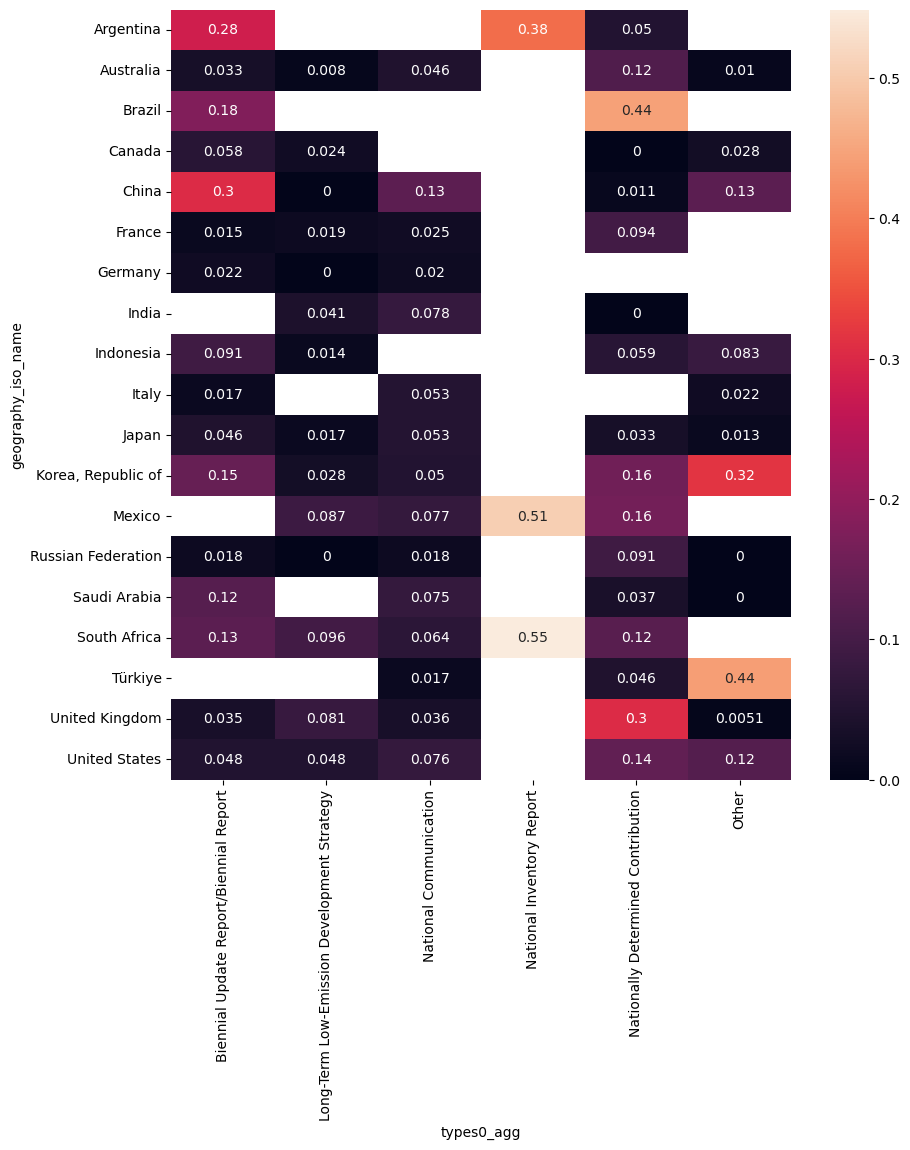

In [33]:
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype = df_countrysubmissions[df_countrysubmissions['geography_iso'].isin(G20)].groupby(['geography_iso_name','types0_agg']).agg(n_ipcc = ('regex_n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype['%_ipcc'] = by_countrytype['n_ipcc']/by_countrytype['n_words']*100.0
by_countrytype = by_countrytype.drop('n_ipcc', axis=1)
by_countrytype = by_countrytype.drop('n_words', axis=1)

df_by_countrytype = pd.DataFrame(by_countrytype)
df_by_countrytype = df_by_countrytype.reset_index()
df_by_countrytype = df_by_countrytype.pivot(index='geography_iso_name', columns='types0_agg', values='%_ipcc')
df_by_countrytype 
#df_by_countrytype = df_by_countrytype.fillna(-1)

#df_by_countrytype.index = pd.CategoricalIndex(df_by_countrytype.index, categories= ["orange", "toffee", "chocolate", "malteser", "raisin", "coffee"])
df_by_countrytype.sort_index(level=0, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(df_by_countrytype,annot=True,mask=df_by_countrytype.isna()) # Your code here